# <center> GRAD5100 - Final project </center>
## Part One
## Yoobee Lim

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
# import random

# 1. Create a dataframe

There are 800 samples.

• Each sample from the dataset has five features called ID, Group, Feature_1, Feature_2
and Feature_3.

• The ID feature is a unique identifier for each sample. The identifier has the form IDxxx
where x is a three digit number.

• The Group feature is either A, B, or C. Roughly a third of each sample lies in each group.

• Feature_1 is sampled randomly from a normal distribution with mean 2500. About 66%
of the data falls between 2200 and 2800.

• Feature_2 is sampled randomly from a normal distribution with mean 400 and standard
deviation 15.

• Feature_3 depends on the Group feature. For A, Feature_3 is approximately
3(Feature_1)-5(Feature_2). For B, Feature_3 is approximately 2(Feature_1). For
C, Feature_3 is approximately -(Feature_1)+(Feature_2). In each of cases A, B, and
C the difference between Feature_3 and the value given by the formula is a normally
distributed random variable with mean 0 and standard deviation 12

In [2]:
np.random.seed(123)

num_samples = 800

In [3]:
# ID feature
id_list=[]
for i in range(0, num_samples):
    id_list.append('ID{:03d}'.format(i))
    i = i + 1

# id_list

In [4]:
# Group feature
num_A = num_samples // 3
num_B = num_samples // 3
num_C = num_samples - num_A - num_B

values_group = ['A'] * num_A + ['B'] * num_B + ['C'] * num_C

np.random.shuffle(values_group)

In [5]:
# creat dataframe
df = pd.DataFrame({
    'ID': id_list,
    'Group': values_group,
    'Feature_1':np.random.normal(2500, (2800 - 2200)/2 , num_samples),
    'Feature_2':np.random.normal(400, 15, num_samples),
    'Feature_3':np.nan
})

In [6]:
# feature 3
for i in range(num_samples):
    if df.at[i, 'Group'] == 'A':
        df.at[i, 'Feature_3'] = 3 * df['Feature_1'][i] - 5 * df['Feature_2'][i] 
    elif df.at[i, 'Group'] == 'B':
        df.at[i, 'Feature_3'] = 2 * df['Feature_1'][i] 
    elif df.at[i, 'Group'] == 'C':
        df.at[i, 'Feature_3'] = -df['Feature_1'][i] + df['Feature_2'][i]
    df.at[i, 'Feature_3'] += np.random.normal(0, 12)

In [7]:
df.head()

,ID,Group,Feature_1,Feature_2,Feature_3
0,ID000,A,2776.169682,414.794622,6276.214460
1,ID001,C,2402.354721,396.946906,-2004.254609
2,ID002,A,2926.545064,413.080180,6745.294400
3,ID003,A,2643.333887,398.748635,5939.400478
4,ID004,A,2243.307636,400.499021,4722.738542


In [8]:
#check group
df.Group.value_counts()

C    268
A    266
B    266
Name: Group, dtype: int64

# 2. Answer the following questions:

a. Based on the theoretical distribution of Feature_1, how many samples do you expect
to find where the value of the feature is greater than 3000?

b. How many samples did you actually find where Feature_1 is greater than 3000?

c. Group the dataset by the Group field and compute the mean and standard deviation of
Feature_3 within each group.


In [9]:
#a
std_dev = (2800 - 2200)/2 

prob_3000 = 1 - stats.norm.cdf(3000, 2500, std_dev)
num_3000 = prob_3000 * num_samples

print(f"Probability: {prob_3000*100} %")
print(f"Expected number(answer for a): {num_3000}")

Probability: 4.77903522728147 %
Expected number(answer for a): 38.23228181825176


In [10]:
#b
list_3000 = df[df['Feature_1'] > 3000]

print(f"Actuall number(answer for b): {len(list_3000)}")

Actuall number(answer for b): 38


In [11]:
#c
print("the mean and standard deviation of feature3 within each group:")

df.groupby(by=["Group"])['Feature_3'].agg(['mean', 'std'])

the mean and standard deviation of feature3 within each group:


,mean,std
Group,,
A,5469.374981,923.320951
B,4998.698717,593.463399
C,-2125.465093,326.958056


# 3. Make a scatterplot of Feature_3 vs Feature_1.

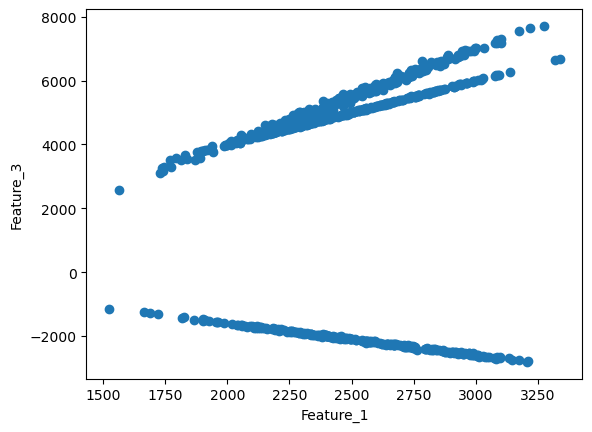

In [12]:
plt.scatter(df['Feature_1'], df['Feature_3'])
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.show()

# 4. Write your constructed dataframe/tibble to a csv file called fake_data.csv.

In [13]:
df.to_csv('fake_data.csv', encoding = 'utf-8')